In [1]:
print("Hello World!")

Hello World!


In [2]:
import os
import tarfile
import urllib
import pandas as pd


In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [5]:
fetch_housing_data()

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
# Dataframe.head() ~ housing.head() will show the first few examples in the dataframe
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
# Dataframe.info() ~ housing.info() will provide some information about the data in the dataframe. 
#    RangeIndex: 20640 ~ means there are 20640 entries or rows in the dataframe
#    longitude: 20640 non-null float64 ~ means that the column/feature longitude has 20640 non-null float64 values
#    total_bedroom: 20433 non-null float64 ~ means that 20433 of the 20640 rows have non-null float64 values, ...
#                         thus 207 rows are missing values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Dataframe["COLUMN_NAME"].value_counts() ~ housing["ocean_proximity"].value_counts() will take the column "ocean_proximity"...
#    from the housing dataframe and provide the number of occurrences for each unique value in that column
#    There are 2658 housing datapoints which have the "NEAR OCEAN" value in the "ocean_proximity" column
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# Dataframe.describe() ~ housing.describe() will provide many valuable statistics for the columns/features of the dataframe
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

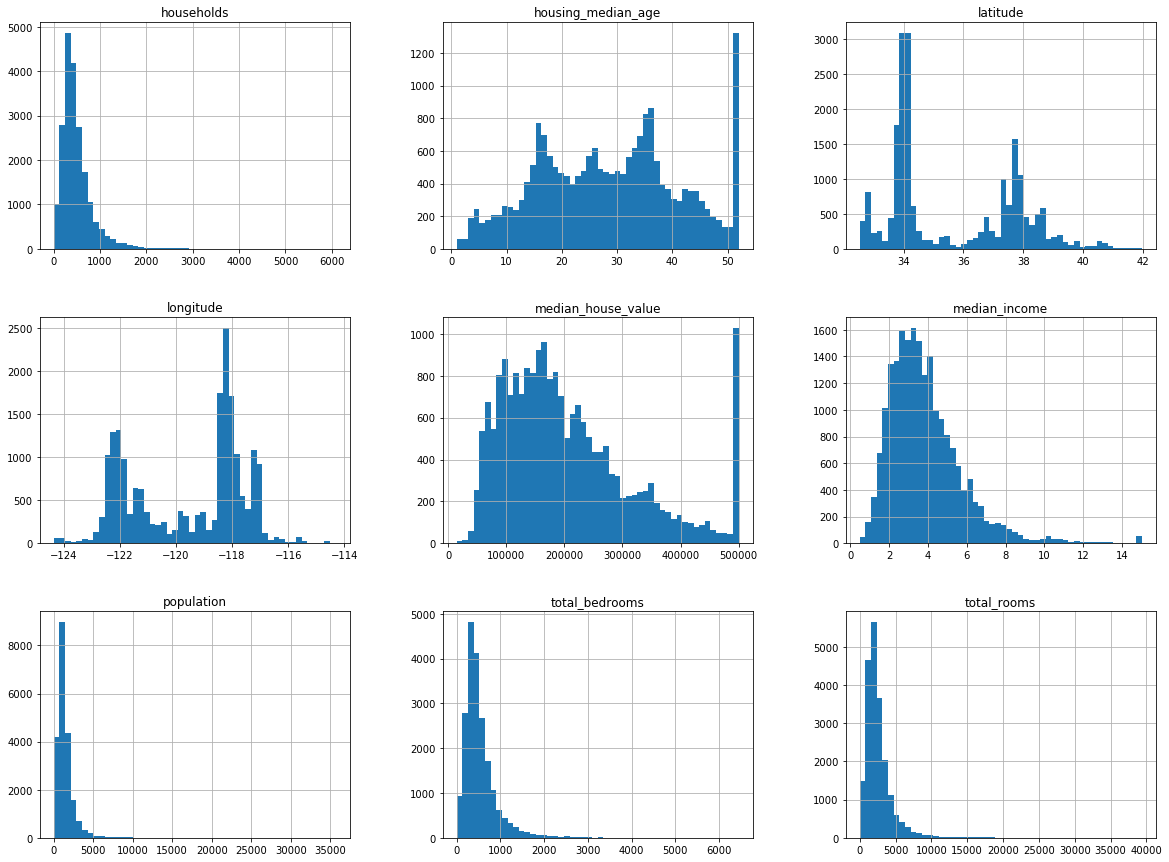

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print("The number of entries in train_set = {}\n".format(len(train_set)))
print("The number of entries in train_set = {}\n".format(len(test_set)))

The number of entries in train_set = 16512

The number of entries in train_set = 4128



In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [15]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [18]:
housing_with_id.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity         id  
0        NEAR BAY -122192.12  
1        NEAR BAY -122182.14  
2        NEAR BAY -122202.15  
3        NEAR BAY -122212.15  
4        NEAR BAY -122212.15

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

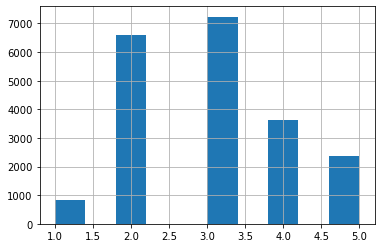

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [24]:
housing = strat_train_set.copy()

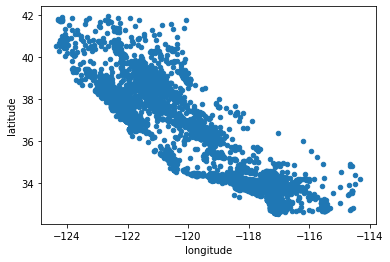

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude")

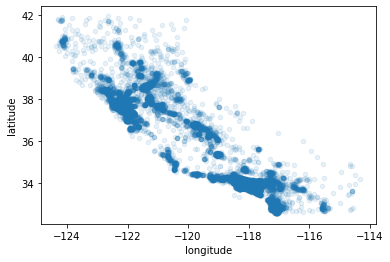

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

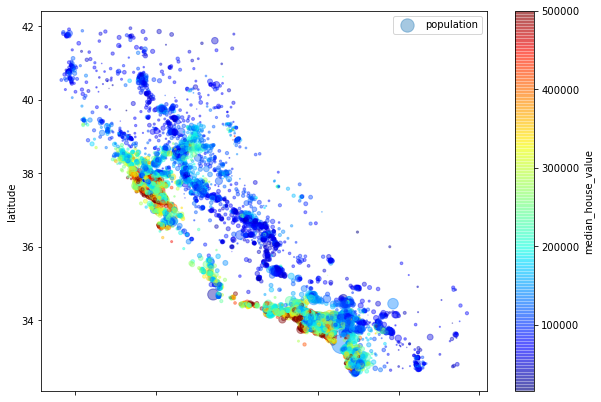

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(10,7), 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C508BD6588>,
      dtype=object)

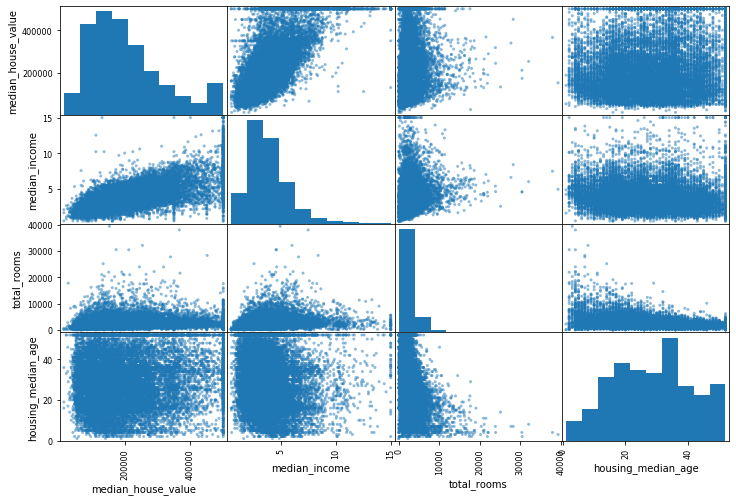

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

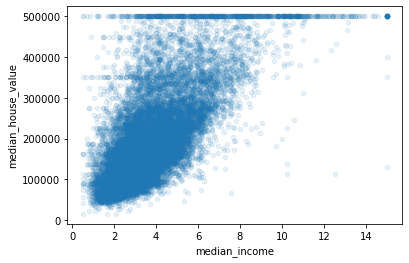

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [32]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Text(0.5, 1.05, 'Correlation Matrix')

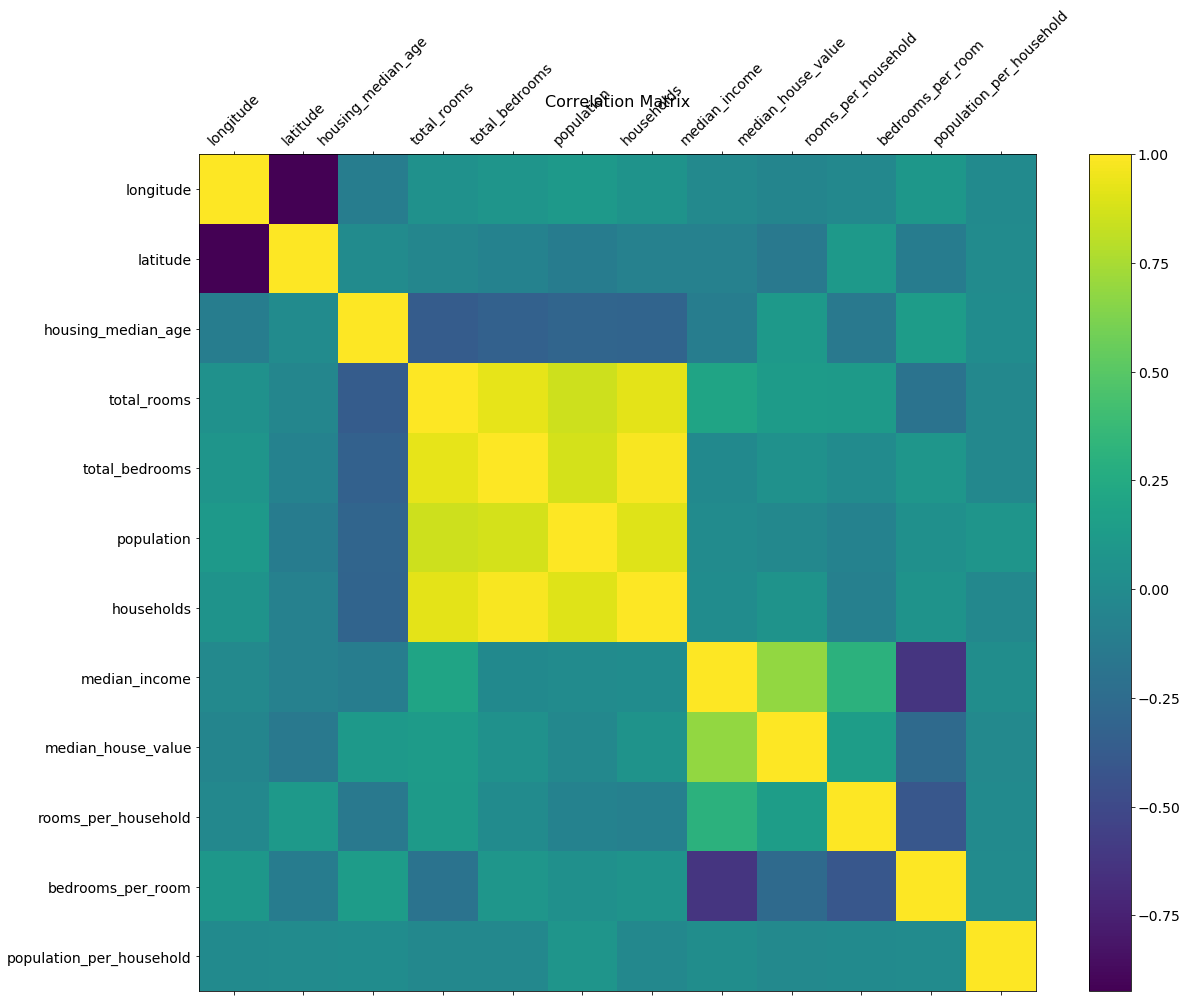

In [33]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning

In [35]:
# total_bedrooms has missing values, we can fix that with one of these next three options

In [36]:
# option 1 ~ this will drop the rows from entire dataframe where the column/feature "total_bedrooms" is empty
housing.dropna(subset=["total_bedrooms"])


# option 2 ~ this will remove the entire column/feature from dataframe
housing.drop("total_bedrooms", axis=1)

# option 3 ~ this will calculate the median value for the 'total_bedroom' column/feature and replace any missing values with...
#                the calculated median value. The 'inplace' flag must be true or your dataframe will not make the changes to...
#                your dataframe but will just execute the command which. The 'inplace' flag will apply the changes directly...
#                to your dataframe
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [37]:
# sklearn has an alternate method for filling in missing values
from sklearn.impute import SimpleImputer

# First we must create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy="median")

# SimpleImputer will fail if there exists categorical data/labels, we must remove to use SimpleImputer
housing_num = housing.drop("ocean_proximity", axis=1)

# We must fit the Imputer to the remaining all numberical dataframe
imputer.fit(housing_num)

print("Imputer Statistics:\n{}\n".format(imputer.statistics_))
print("Dataframe Statistics:\n{}\n".format(housing_num.median().values))

# Now we can replace the missing values with the trained values of the imputer, this will return a numpy array
X = imputer.transform(housing_num)

# Put numpy array back into a dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)


Imputer Statistics:
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]

Dataframe Statistics:
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]



# Categorical Data

In [38]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [39]:
# Convert the categorical data in the 'ocean_proximity' column/feature into numerical
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print("The first 10 values in housing_cat_encoded: \n{}".format(housing_cat_encoded[:10]))
# This will then allow you to associate those categorical values into numerical and the OrdinalEncoder...
#   saves the mapping between the two so you are able to go back and forth as needed.
print("Ordinal Encorder Categories:\n{}\n".format(ordinal_encoder.categories_))

The first 10 values in housing_cat_encoded: 
[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]
Ordinal Encorder Categories:
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]



In [40]:
# Machine learning will assume distance between values corresponds to similarity. So it would assume that "<1H OCEAN"...
#    is more similar to "INLAND" when it is much more similar to "NEAR OCEAN".
# To Solve this we can one-hot encode 
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# housing_cat_1hot will be returned as a sparse array ~ thus the 0 data is not included, only locations where non-zero...
#    this will save memory as a vast majority of the array will be 0's. You can convert into a dense array, one which...
#    contains the 0's populated by using "housing_cat_1hot.toarray()"
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# The categories are available using the fit encoder
print("One Hot Encoder Categories:\n{}\n".format(cat_encoder.categories_))


One Hot Encoder Categories:
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]



# Custom Transformers

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [42]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print("Housing Extra Attribs:\n{}".format(housing_extra_attribs))

Housing Extra Attribs:
[[-121.89 37.29 38.0 ... '<1H OCEAN' 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ... '<1H OCEAN' 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ... 'NEAR OCEAN' 4.225108225108225 2.0259740259740258]
 ...
 [-116.4 34.09 9.0 ... 'INLAND' 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ... '<1H OCEAN' 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ... 'NEAR BAY' 4.843505477308295 1.9859154929577465]]


# Transformation Pipelines

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# The Pipeline class takes a list of steps, this case we use the 'imputer' first, then 'attribs_adder', then "std_scaler"
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                         ("attribs_adder", CombinedAttributesAdder()),
                         ("std_scaler", StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [44]:
# Column based transformation pipelines

from sklearn.compose import ColumnTransformer

# List of numerical column names ~ just a list of housing_num which was a dataframe we made previously containing only numerical data
num_attribs = list(housing_num)

# List of categorical columns ~ since we only have one categorical column "ocean_proximity", we manually specify it
cat_attribs = ["ocean_proximity"]


# full_pipeline works by first calling our 'num_pipeline', we specified above. This will run through its pipeline first. Since...
#    this is the ColumnTransformer, it works on each column and then concatenates the results. Finally we use OneHotEncoding...
#    on the categorical column.
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)

# Training a Model

In [45]:
# Linear Regression is used in this example but it would require there to be a linear relationship between the data...
#    for this algorithm to perform well. A root mean square error of 68628 is fairly high we can conclude a linear relationship...
#    may exist but to better capture the data/patterns we need more degrees of freedom.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("\nPredictions:", lin_reg.predict(some_data_prepared))
print("\nLabels:", list(some_labels))

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("\nLinear Regression Root Mean Square Error: {}\n".format(lin_rmse))


Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

Linear Regression Root Mean Square Error: 68628.19819848923



In [46]:
# Decision Tree ~ should be able to fit the data much better but typically will overfit without some form of prunning...
#    Prunning removes some specified number of leaves or even hold nodes, based on how the prunning is implemented...
#    Some will remove nodes where the information gain is not above a certain threshold, others may remove leaves which...
#    do not contain a thresholded number of instances.

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

# Fitting the model is training the model
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("\n Decision Tree Regression Root Mean Square Error: {}\n".format(tree_rmse))

# We can see the Decision Tree Regressor has a RMSE of 0.0 and that is being it does not have prunning implemented, thus...
#    has overfit the training data perfectly (which is bad).


 Decision Tree Regression Root Mean Square Error: 0.0



# Cross-Validation

In [47]:
# Cross-Validation will take a subset of the dataset and train the model on that, evaluate and compare. CV=10, means we...
#    will be doing this evaluation 10 times with 10 randomly selected subsets.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
def display_scores(scores):
    print("\nScores: {}\n".format(scores))
    print("\nMean: {}\n".format(scores.mean()))
    print("\nStandard Deviation: {}\n".format(scores.std()))

In [49]:
display_scores(tree_rmse_scores)


Scores: [68816.17850129 67154.04034962 70548.74304534 68122.09105038
 71463.88483127 74890.76897919 69350.30382236 69222.17110541
 75828.08995568 68870.23519973]


Mean: 70426.65068402838


Standard Deviation: 2717.36962002629



In [50]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]


Mean: 69052.46136345083


Standard Deviation: 2731.674001798349



# Ensemble Learning

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)


Scores: [49292.85950783 48055.31023134 49856.02411341 52290.46534913
 49588.4656239  53707.43457337 48821.56324338 48146.07333957
 53108.20778939 50475.7016243 ]


Mean: 50334.21053956099


Standard Deviation: 1925.0791231381



# GridSearch

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]}, 
              {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid=param_grid, cv=5,
                           scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [53]:
cvres = grid_search.cv_results_

for mean_score, params  in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64564.942354479426 {'max_features': 2, 'n_estimators': 3}
55482.4477244341 {'max_features': 2, 'n_estimators': 10}
52893.6918208343 {'max_features': 2, 'n_estimators': 30}
60478.36538291488 {'max_features': 4, 'n_estimators': 3}
52906.399422559276 {'max_features': 4, 'n_estimators': 10}
50275.51649613137 {'max_features': 4, 'n_estimators': 30}
59207.74838595131 {'max_features': 6, 'n_estimators': 3}
52005.91177660495 {'max_features': 6, 'n_estimators': 10}
50161.76014818296 {'max_features': 6, 'n_estimators': 30}
58673.296084782625 {'max_features': 8, 'n_estimators': 3}
51826.28570675821 {'max_features': 8, 'n_estimators': 10}
50218.07138669233 {'max_features': 8, 'n_estimators': 30}
63820.90378381532 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54232.90638637995 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60178.970950634044 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52809.71368896124 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [54]:
feature_importance = grid_search.best_estimator_.feature_importances_
print("\nFeature Importance: \n{}\n".format(feature_importance))

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

resultes = sorted(zip(feature_importance, attributes), reverse=True)

print("Results of Feature and Importance: \n{}\n".format(resultes))


Feature Importance: 
[7.36835432e-02 6.60209832e-02 4.32508326e-02 1.79704209e-02
 1.66741402e-02 1.71823240e-02 1.57151407e-02 3.09919405e-01
 5.23568125e-02 1.11449485e-01 9.71765078e-02 7.48631868e-03
 1.64381584e-01 7.21134769e-05 2.93499437e-03 3.72539473e-03]

Results of Feature and Importance: 
[(0.30991940465228257, 'median_income'), (0.16438158389745144, 'INLAND'), (0.11144948514925004, 'pop_per_hhold'), (0.09717650780301433, 'bedrooms_per_room'), (0.07368354316719972, 'longitude'), (0.06602098315691106, 'latitude'), (0.05235681250375809, 'rooms_per_hhold'), (0.04325083255474583, 'housing_median_age'), (0.0179704208793358, 'total_rooms'), (0.017182324039167397, 'population'), (0.016674140219758854, 'total_bedrooms'), (0.0157151407167709, 'households'), (0.007486318683109752, '<1H OCEAN'), (0.003725394731043233, 'NEAR OCEAN'), (0.0029349943692654097, 'NEAR BAY'), (7.211347693567463e-05, 'ISLAND')]



# Evaluate The Model

In [55]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("\nThe Final Model Root Mean Squared Error: {}\n".format(final_rmse))

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2

final_results = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                       loc=squared_errors.mean(),
                       scale=stats.sem(squared_errors)))

print("\nFinal Results: {}\n".format(final_results))


The Final Model Root Mean Squared Error: 47831.695767396704


Final Results: [45848.76831204 49735.6279164 ]

